# 1. Get Data

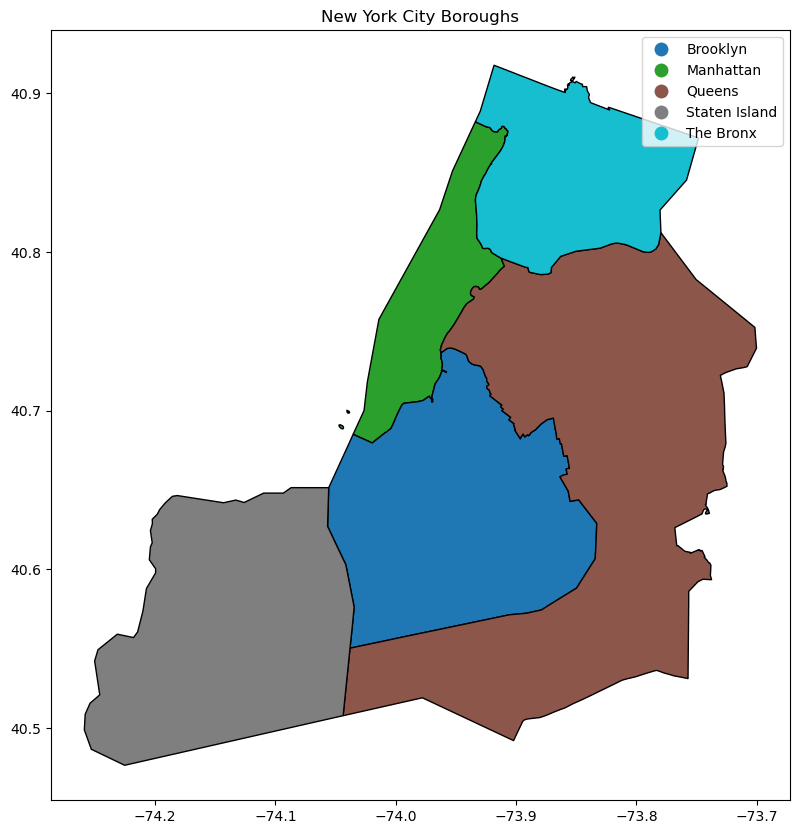

In [4]:
# 1.1 NYC Shapefile per census tract, with projection to EPSG:32618


# Setp 1: Get the shapefile of New York State in census tract level

# Step 2: Clip it by the boundary of New York City

# Step 3: Now have the GEOID of all census tracts in NYC, and also in different boroughs
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# 定义纽约市五个 Borough 的名称
boroughs = [
    "Manhattan, New York City, New York, USA",
    "Brooklyn, New York City, New York, USA",
    "Queens, New York City, New York, USA",
    "The Bronx, New York City, New York, USA",
    "Staten Island, New York City, New York, USA",
]

# 创建一个空的 GeoDataFrame 来存储所有 Borough 的边界
all_boroughs = gpd.GeoDataFrame()

# 遍历每个 Borough 获取边界
for borough in boroughs:
    # 获取 Borough 的边界
    borough_area = ox.geocode_to_gdf(borough)
    # 添加 Borough 名称作为一列
    borough_area["borough"] = borough.split(",")[0]
    # 合并到总的 GeoDataFrame
    all_boroughs = gpd.GeoDataFrame(pd.concat([all_boroughs, borough_area], ignore_index=True))

# 保存为 GeoJSON 文件
all_boroughs.to_file("D:/下载/nyc_boroughs.geojson", driver="GeoJSON")

# 绘制地图展示
all_boroughs.plot(column="borough", legend=True, figsize=(10, 10), edgecolor="black")
plt.title("New York City Boroughs")
plt.show()



In [18]:
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
# TODO: kMA3pLN5r66BAnhG4hQvEr8Mi is my own token
client = Socrata("data.cityofnewyork.us", "kMA3pLN5r66BAnhG4hQvEr8Mi")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("63ge-mke6", limit=3000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

<Axes: >

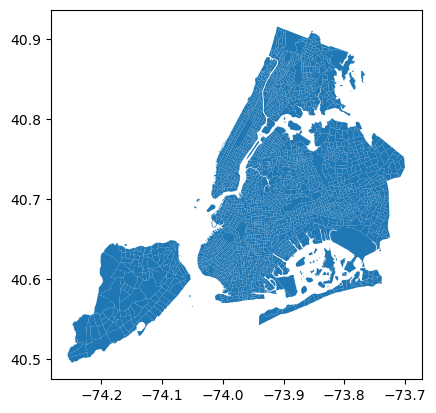

In [26]:
results_geo = gpd.GeoDataFrame(results_df, geometry="geometry", crs="EPSG:4326")
results_geo.plot()

In [34]:
results_geo.head()

,the_geom,boro_code,boro_name,shape_leng,shape_area,geometry
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",5,Staten Island,325910.306061,1623618684.31,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",1,Manhattan,360037.634094,636646043.944,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",2,Bronx,463180.578868,1187174772.2,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",3,Brooklyn,728143.833073,1934142774.75,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",4,Queens,887896.284851,3041416726.79,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


In [ ]:
# TODO: kMA3pLN5r66BAnhG4hQvEr8Mi is my own token
client = Socrata("data.cityofnewyork.us", "kMA3pLN5r66BAnhG4hQvEr8Mi")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("7t3b-ywvw")

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)


In [29]:
results_df.head()

,the_geom,boro_code,boro_name,shape_leng,shape_area
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",5,Staten Island,325910.306061,1623618684.31
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",1,Manhattan,360037.634094,636646043.944
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",2,Bronx,463180.578868,1187174772.2
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",3,Brooklyn,728143.833073,1934142774.75
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",4,Queens,887896.284851,3041416726.79


<Axes: >

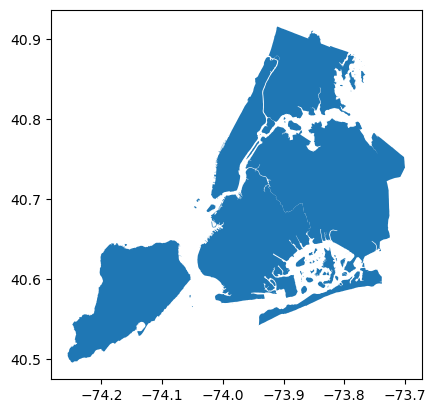

In [33]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import shape

# 确保 the_geom 列存在并且不是空值
results_df = results_df[results_df["the_geom"].notnull()]

# 转换 the_geom 列为 Shapely 几何对象
results_df["geometry"] = results_df["the_geom"].apply(lambda x: shape(x))

# 创建 GeoDataFrame
results_geo = gpd.GeoDataFrame(results_df, geometry="geometry", crs="EPSG:4326")

# 绘制矢量数据
results_geo.plot()


In [17]:
import pandas as pd

# 读取 Excel 文件
file_path = "D:/下载/colp_20240630_csv/colp_20240630.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# 假设要统计列名为 'column_name' 的唯一值
column_name = "EXCATDESC"
unique_values = df[column_name].unique()

# 打印唯一值和计数
print(f"唯一值数量: {len(unique_values)}")
print("唯一值:", unique_values)


唯一值数量: 10
唯一值: ['CULTURAL & RECREATIONAL USE' 'EDUCATIONAL USE' 'PROPERTY WITH NO USE'
 'OFFICE USE' 'MAINTENANCE, STORAGE, & INFRASTRUCTURE USE'
 'PROPERTY WITH RESIDENTIAL USE' 'LEASED OUT TO PRIVATE TENANT'
 'PUBLIC SAFETY & CRIMINAL JUSTICE USE' 'HEALTH & SOCIAL SERVICES USE' nan]


In [7]:
df.head()

,FACNAME,ADDRESSNUM,STREETNAME,ADDRESS,CITY,ZIPCODE,FACTYPE,FACSUBGRP,FACGROUP,FACDOMAIN,...,NTA2010,NTA2020,COUNCIL,CT2010,CT2020,BOROCODE,SCHOOLDIST,POLICEPRCT,DATASOURCE,UID
0,I.S. 075 FRANK D. PAULO,455,HUGUENOT AVENUE,455 HUGUENOT AVENUE,STATEN ISLAND,10312.0,JUNIOR HIGH-INTERMEDIATE-MIDDLE SCHOOL - PUBLIC,PUBLIC K-12 SCHOOLS,SCHOOLS (K-12),"EDUCATION, CHILD WELFARE, AND YOUTH",...,SI48,SI0303,51.0,17010.0,17014.0,5.0,31.0,123.0,doe_lcgms,000081aff7e44860160371b7a6b79e9a
1,SUCCESS ACADEMY CS - BENSONHURST,NaN,NaN,99 AVE P-4TH FL,BROOKLYN,11204.0,CHARTER SCHOOL,CHARTER K-12 SCHOOLS,SCHOOLS (K-12),"EDUCATION, CHILD WELFARE, AND YOUTH",...,BK29,BK1101,44.0,43000.0,43000.0,3.0,21.0,62.0,nysed_activeinstitutions,000105fd986377e37a8f95abfdbda92d
2,PLANNED PARENTHOOD BRONX HEALTH CENTER,349,EAST 149 STREET,349 EAST 149 STREET,BRONX,10451.0,DIAGNOSTIC AND TREATMENT CENTER EXTENSION CLINIC,HOSPITALS AND CLINICS,HEALTH CARE,HEALTH AND HUMAN SERVICES,...,BX34,BX0102,17.0,6500.0,6500.0,2.0,7.0,40.0,nysdoh_healthfacilities,000186821f899fef28e05c9ca2182621
3,WASHINGTON IRVING YABC,40,IRVING PLACE,40 IRVING PLACE,NEW YORK,10003.0,FEEDING SITE,CHILD NUTRITION,CHILD SERVICES AND WELFARE,"EDUCATION, CHILD WELFARE, AND YOUTH",...,MN21,MN0602,2.0,5000.0,5000.0,1.0,2.0,13.0,nysed_activeinstitutions,0002d3b5bb64af5fbc4d28e67dd33e1a
4,MARKS JCH OF BENSONHURST DAY CAMP,7802,BAY PARKWAY,7802 BAY PARKWAY,BROOKLYN,11214.0,CAMP - ALL AGE,CAMPS,CAMPS,"EDUCATION, CHILD WELFARE, AND YOUTH",...,BK28,BK1101,44.0,27000.0,27000.0,3.0,20.0,62.0,dohmh_daycare,00056520e4c5483e13933cda8c8a736d


In [ ]:
# 1.2 NYC OSM data

In [ ]:
# 1.3 NYC ACS socio-economic data